In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

#SKLearn stuff
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

# Header cleaning. More precautionary than anything else
df.columns = [x.strip().lower().replace(' ','').replace('-','') for x in df.columns]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Removing outliers
df = df[df['bedrooms'] <=15] #Only 1 record remove. 33 Bed, 1.75 Bath?

In [6]:
# Change view rating to a numeric value. Probably don't need it
df['view'] = df['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'AVERAGE':3,
                             'FAIR':2,
                             'NONE':1})

# Change condition rating to a numeric value. Probably don't need it
df['condition'] = df['condition'].map({'Very Good':5,
                                       'Good':4,
                                       'Average':3,
                                       'Fair':2,
                                       'Poor':1})



In [7]:
# Changing grade to just the numeric value of the grade
df['grade'] = df['grade'].str.split(' ').str[0].astype(int)

In [9]:
#The number of records where view is nan is 0.29% of the dataset. Hence dropped
print(df.view.isna().sum() /df.shape[0])
df.dropna(subset=['view'],inplace=True)

0.0029172068901648454


In [10]:
df.corr().price.sort_values()

zipcode         -0.053626
id              -0.017383
long             0.022428
condition        0.035367
yr_built         0.054284
sqft_lot15       0.083194
sqft_lot         0.090341
yr_renovated     0.129890
floors           0.257069
lat              0.307863
bedrooms         0.315236
view             0.395739
bathrooms        0.525063
sqft_living15    0.585329
sqft_above       0.605719
grade            0.668320
sqft_living      0.701599
price            1.000000
Name: price, dtype: float64

In [11]:
df = df.drop(columns = ['id','yr_renovated','yr_built','floors','date'],axis =1)

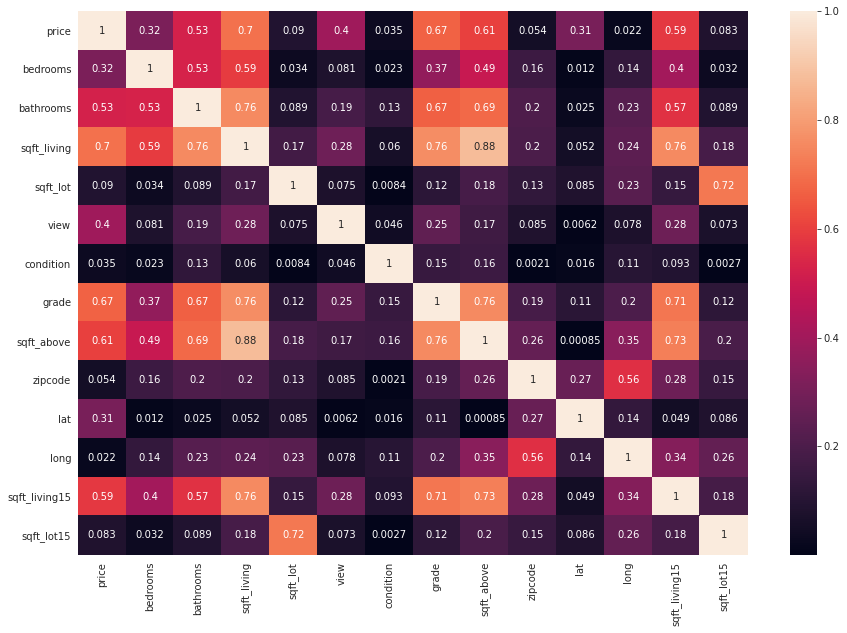

In [12]:
# sns.heatmap(df.corr(),annot=True)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(abs(df.corr()),annot=True)

In [13]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Define our X and y
X = df.drop(columns='price')
y = df['price']

In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [47]:
cols = ['bedrooms','bathrooms','sqft_living','zipcode']
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [65]:
# Because the number of columns in the encoded matrix, is high, the output has to be made explicitly .toarray() or .todense()

encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

catcols = ['bedrooms','bathrooms','zipcode']
ct = ColumnTransformer(transformers=[('ohe', encoder, catcols)],
                       remainder='passthrough')



ct.fit(X_train_subset)
X_train_enc = ct.transform(X_train_subset).todense()
X_test_enc = ct.transform(X_test_subset).todense()

In [66]:
# #USE encoded training and test  sets here!

# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(X_train_enc, y_train) 
# print("Training Score:",pipe.score(X_train_enc, y_train))
# print("Test Score:",pipe.score(X_test_enc, y_test))

In [67]:
#Scale
scaler = StandardScaler()
scaler.fit(X_train_enc,y_train)

X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [68]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

train_preds=lr.predict(X_train_scaled)
test_preds=lr.predict(X_test_scaled)

In [69]:
print('Training Score:',r2_score(y_train,train_preds))
print('Test Score:',r2_score(y_test,test_preds))

Training Score: 0.76244572374451
Test Score: 0.7259527816590763


In [70]:
#Just to get summary
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     444.7
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:20:37   Log-Likelihood:            -2.0369e+05
No. Observations:               15073   AIC:                         4.076e+05
Df Residuals:                   14964   BIC:                         4.084e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.433e+05   1462.591    371.491      0.000     5.4e+05    5.46e+05
x1         -8645.6793   5319.205     -1.625      0.104   -1.91e+04    1780.613
x2         -2.296e+04   7945.550     -2.889      0.004   -3.85e+04   -7384.067
x3         -4.205e+04   7622.339     -5.516      0.000    -5.7e+04   -2.71e+04
x4         -3.767e+04   4496.120     -8.379      0.000   -4.65e+04   -2.89e+04
x5         -2.644e+04   2342.174    -11.290      0.000    -3.1e+04   -2.19e+04
x6          -1.12e+04   1674.927     -6.687      0.000   -1.45e+04   -7916.820
x7         -1.127e+04   1545.278     -7.292      0.000   -1.43e+04   -8239.974
x8         -9510.9239   1723.504     -5.518      0.000   -1.29e+04   -6132.644
x9         -1.025e+04   1519.458     -6.748      0.000   -1.32e+04   -7274.651
x10        -1975.1871   1472.999     -1.341      0.180   -4862.446     912.072
x11         4158.6366   7395.876      0.562      0.574   -1.03e+04    1.87e+04
x12         2.175e+04   4.85e+04      0.449      0.654   -7.32e+04    1.17e+05
x13        -1618.4425   2930.585     -0.552      0.581   -7362.749    4125.864
x14         4853.8090   3.21e+04      0.151      0.880    -5.8e+04    6.77e+04
x15         5580.2382   4.41e+04      0.127      0.899   -8.08e+04     9.2e+04
x16         3806.6934    3.6e+04      0.106      0.916   -6.68e+04    7.44e+04
x17         2245.6273   3.77e+04      0.060      0.952   -7.16e+04    7.61e+04
x18         2658.0758   5.49e+04      0.048      0.961   -1.05e+05     1.1e+05
x19         1873.6346   2.94e+04      0.064      0.949   -5.57e+04    5.95e+04
x20         5458.8939   2.34e+04      0.233      0.816   -4.04e+04    5.14e+04
x21         1.702e+04   2.11e+04      0.808      0.419   -2.43e+04    5.83e+04
x22         8025.7929   2.35e+04      0.341      0.733   -3.81e+04    5.42e+04
x23         1.227e+04   1.09e+04      1.127      0.260   -9071.154    3.36e+04
x24         1.461e+04   9484.359      1.541      0.123   -3977.893    3.32e+04
x25         1.841e+04   7957.723      2.313      0.021    2810.744     3.4e+04
x26         1.641e+04   9317.772      1.761      0.078   -1857.626    3.47e+04
x27         1.827e+04   4643.670      3.935      0.000    9168.597    2.74e+04
x28         1.623e+04   4406.039      3.684      0.000    7596.982    2.49e+04
x29         1.584e+04   3460.518      4.579      0.000    9061.932    2.26e+04
x30         1.886e+04   3287.694      5.738      0.000    1.24e+04    2.53e+04
x31          382.7788   2327.462      0.164      0.869   -4179.332    4944.889
x32          1.44e+04   2561.434      5.623      0.000    9381.814    1.94e+04
x33         9829.1884   1799.027      5.464      0.000    6302.876    1.34e+04
x34         1477.9177   2078.894      0.711      0.477   -2596.969    5552.805
x35         6098.2930   2093.480      2.913      0.004    1994.816    1.02e+04
x3

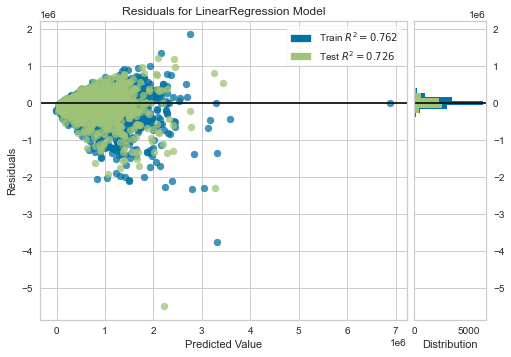

In [59]:
# visualizing our residuals 
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

In [60]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

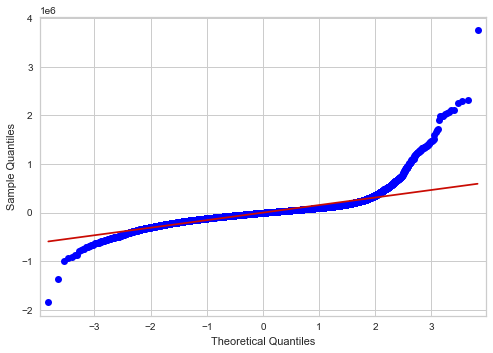

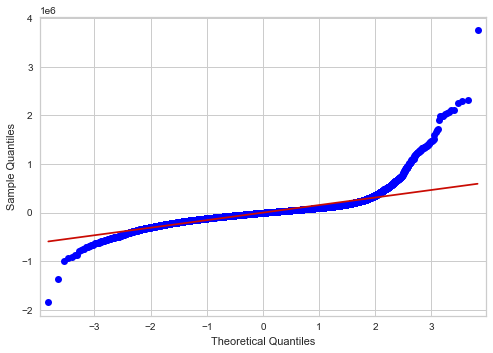

In [61]:
sm.qqplot(train_residuals, line = 'r')

In [77]:
#MAE RMSE
# X_train_scaled,train_preds

print("Training Metrics:")
# R2
print(f"R2: {r2_score(y_train, train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")

Training Metrics:
R2: 0.762
Mean Absolute Error: 105184.129
Mean Squared Error: 32010572410.681
Root Mean Squared Error: 178914.987


In [78]:
print("Testing Metrics:")
# R2
print(f"R2: {r2_score(y_test, test_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(y_test, test_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(y_test, test_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(y_test, test_preds, squared=False):.3f}")

Testing Metrics:
R2: 0.726
Mean Absolute Error: 107521.144
Mean Squared Error: 36218608276.766
Root Mean Squared Error: 190311.871


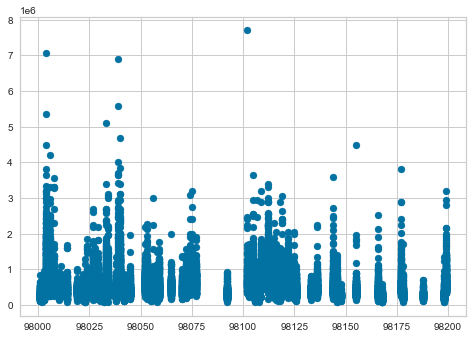

In [76]:
plt.scatter(df['zipcode'], df['price'] )

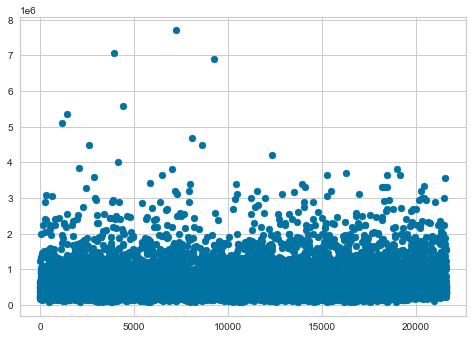

In [74]:
plt.scatter(df.index, df['price'] )

(array([2851., 4363., 3333., 1692.,  349., 4247., 1801., 1130., 1037.,
         730.]),
 array([98001. , 98020.8, 98040.6, 98060.4, 98080.2, 98100. , 98119.8,
        98139.6, 98159.4, 98179.2, 98199. ]),
 <BarContainer object of 10 artists>)

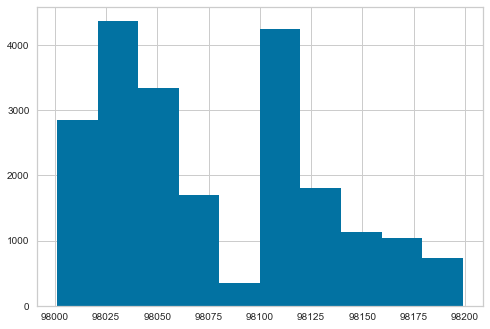

In [73]:
plt.hist(df['zipcode'])

In [79]:
df['price'].mean()

540053.0224771281

In [80]:
df['price'].median()

450000.0